In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/ML Work/processed.cleveland_new.csv',header=None)
print(data.head())
print(data.info())
#round(data.describe(),2)

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non

In [28]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
target = ['num']

age = data.iloc[:,0]
sex = data.iloc[:,1]
cp = data.iloc[:,2]
trestbps = data.iloc[:,3]
chol = data.iloc[:,4]
fbs = data.iloc[:,5]
restecg = data.iloc[:,6]
thalach = data.iloc[:,7]
exang = data.iloc[:,8]
oldpeak = data.iloc[:,9]
slope = data.iloc[:,10]
ca = data.iloc[:,11]
thal = data.iloc[:,12]

num = data.iloc[:,13]

In [29]:
print(data.isnull().sum())
ca = ca.replace('?',ca.mode()[0])
thal = thal.replace('?',thal.mode()[0])

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
#Pre-processing Steps
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data.columns=column_names

#replace ? with mode
data['ca'] = data['ca'].replace('?',data['ca'].mode()[0])
data['thal'] = data['thal'].replace('?',data['thal'].mode()[0])

data['num'] = data['num'].apply(lambda x: 1 if x>0 else 0)

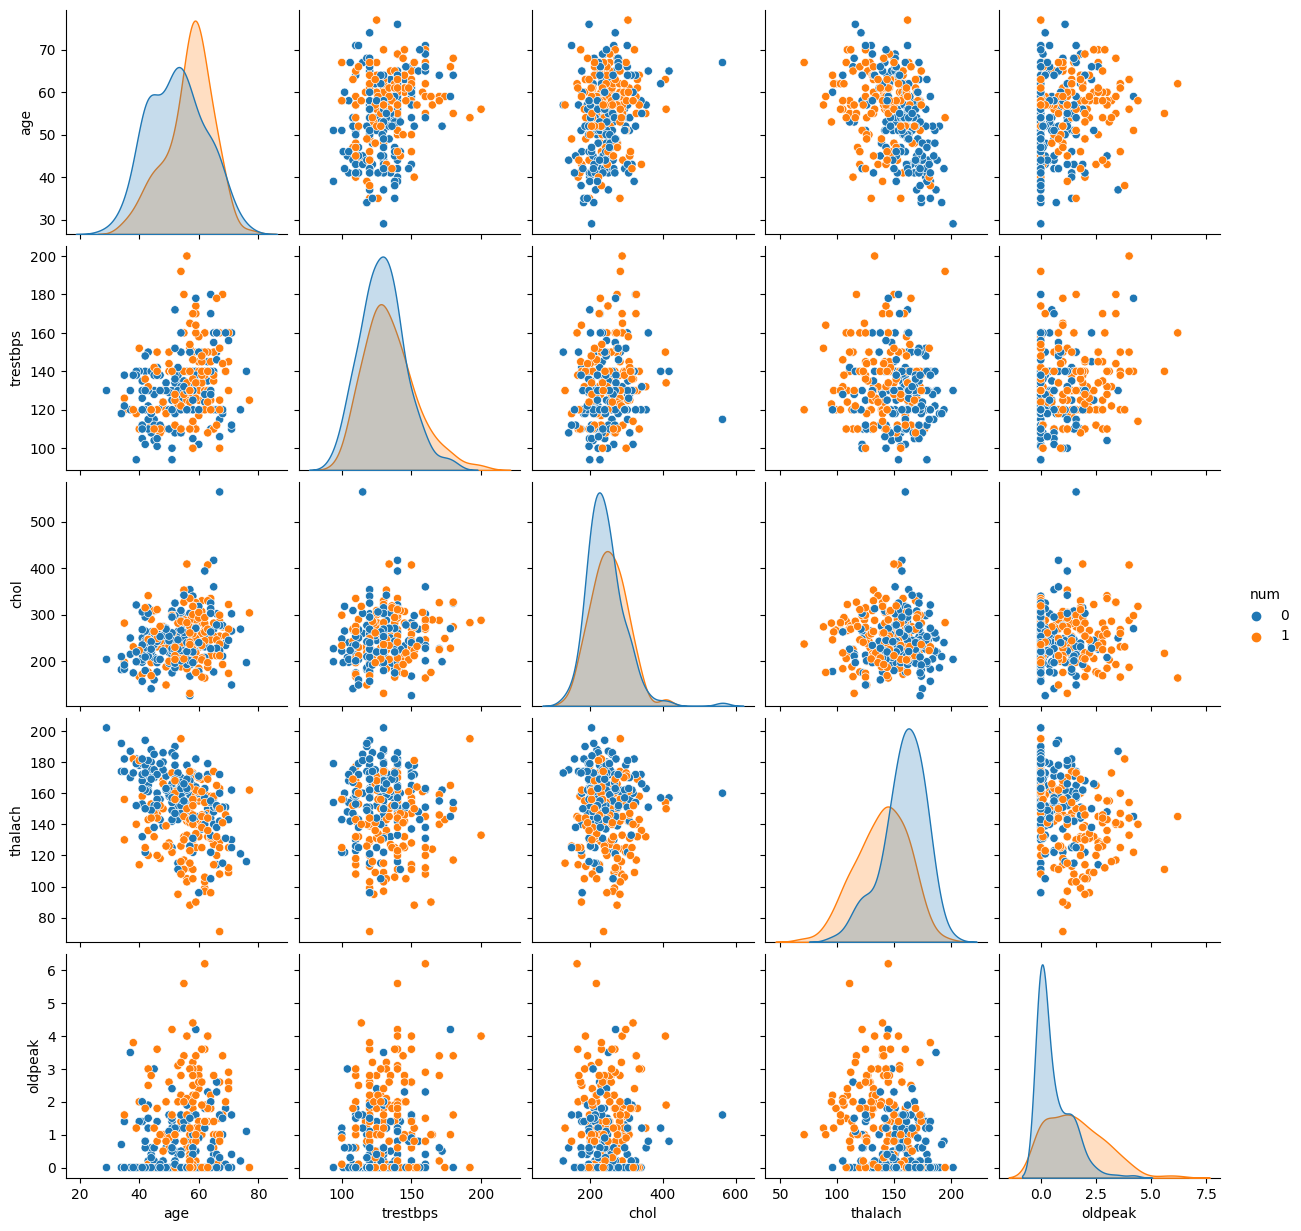

In [ ]:
#Pair plots
sns.pairplot(data,hue='num',vars=['age','trestbps','chol','thalach','oldpeak'])
plt.show()

<ipython-input-30-fe83cfb13dca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age, bins=20)


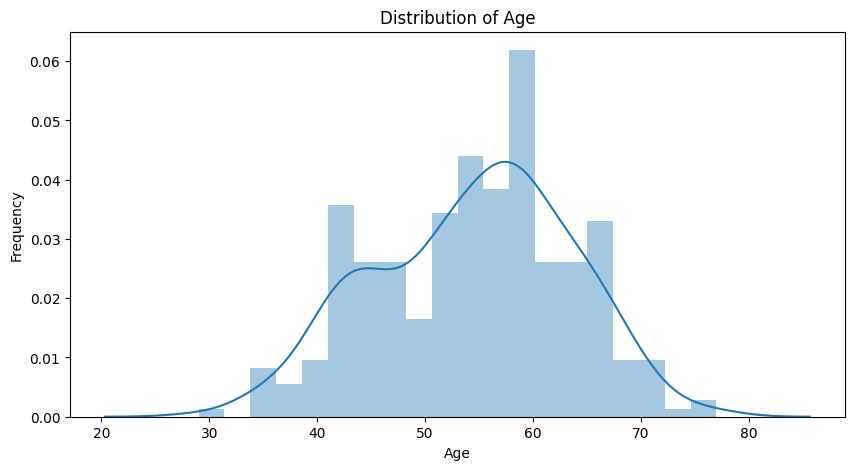

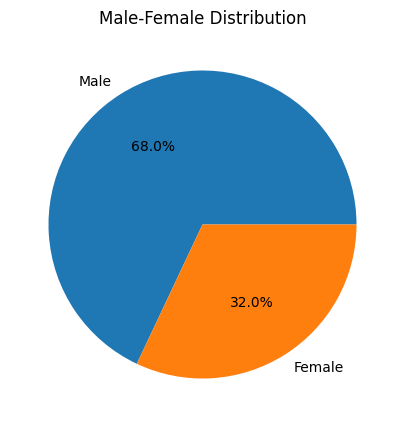

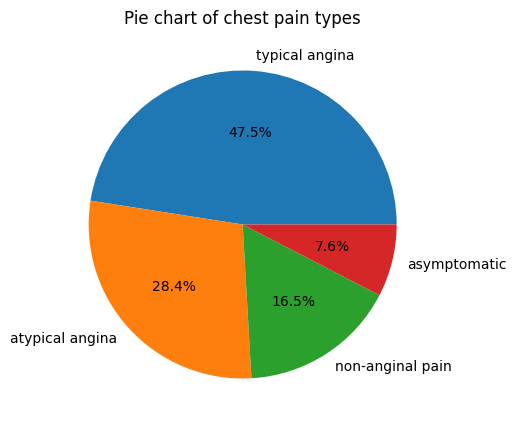

<ipython-input-30-fe83cfb13dca>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trestbps, bins=20)


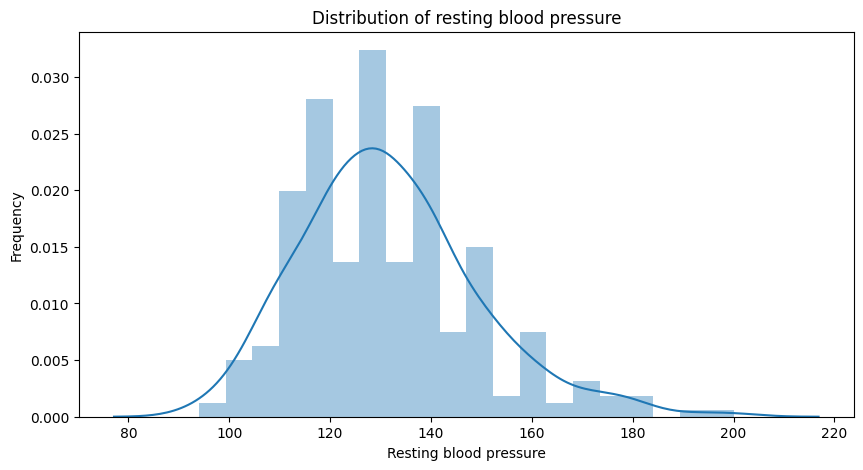

<ipython-input-30-fe83cfb13dca>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(chol, bins=20)


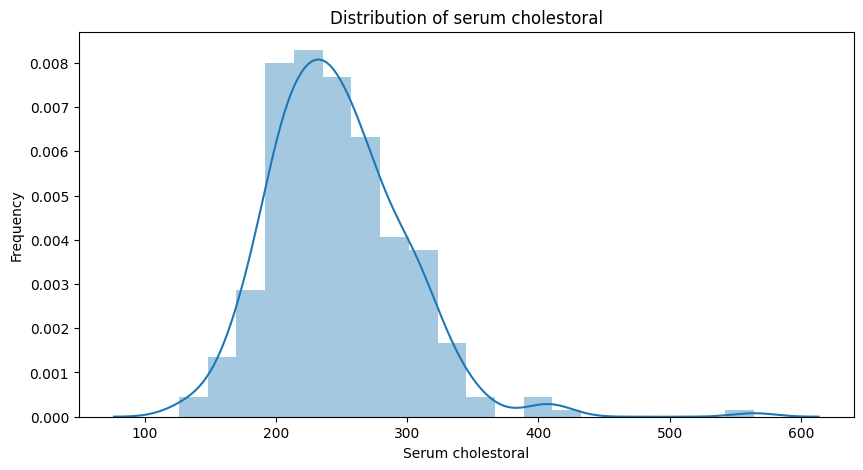

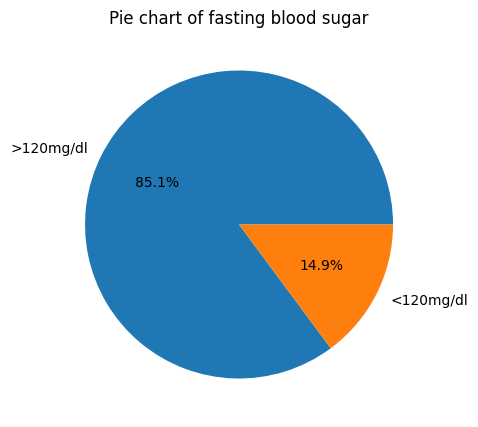

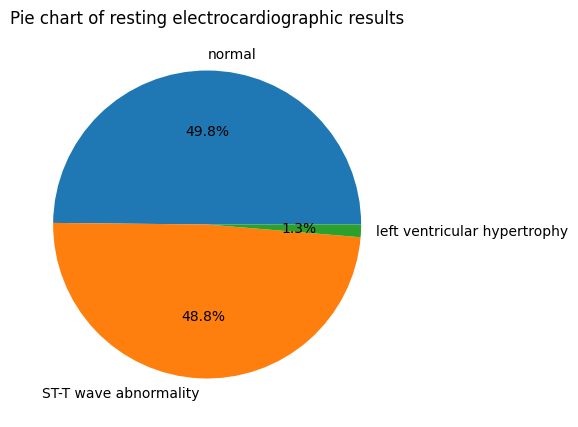

<ipython-input-30-fe83cfb13dca>:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(thalach, bins=20)


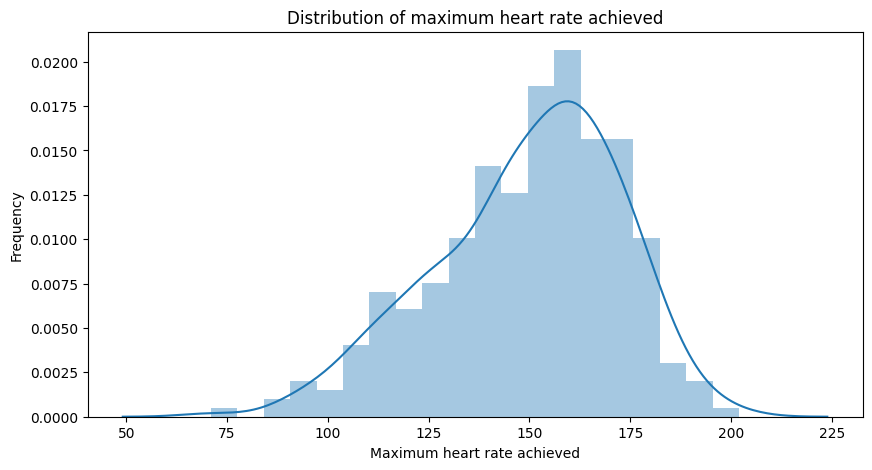

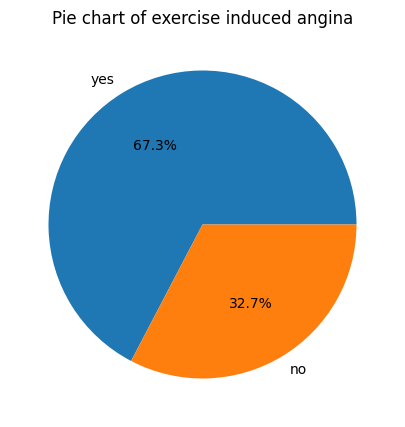

<ipython-input-30-fe83cfb13dca>:72: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oldpeak, bins=20)


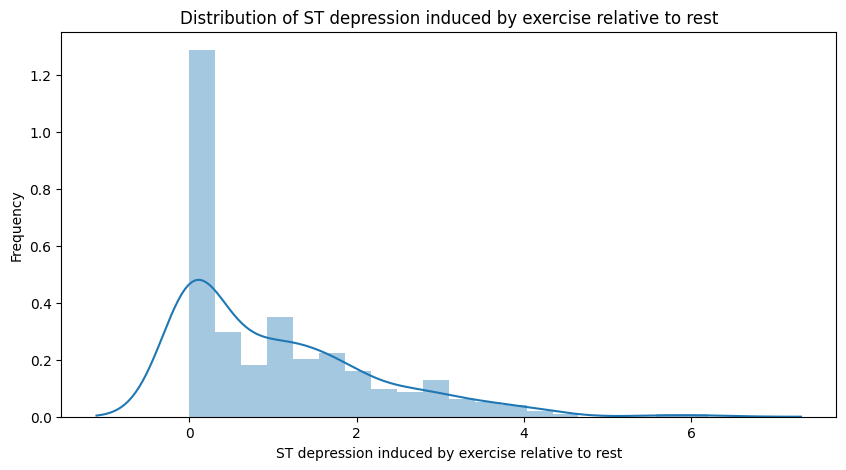

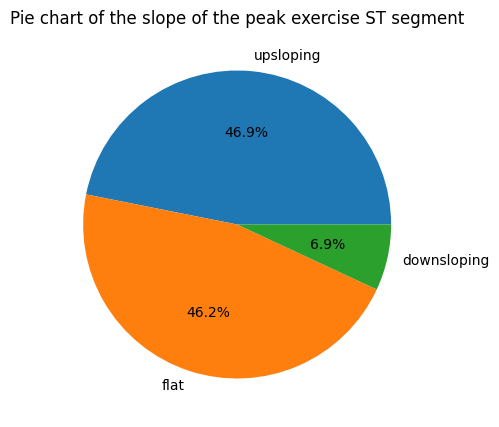

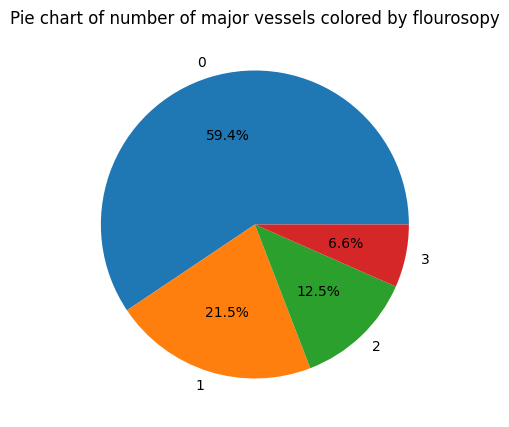

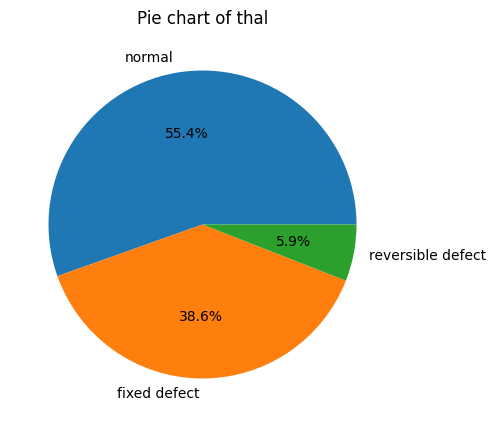

ValueError: ignored

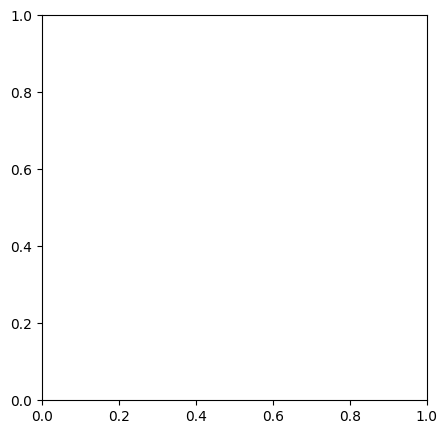

In [30]:
#perform EDA on the data

#distribution of age
plt.figure(figsize=(10,5))
sns.distplot(age, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#male-female pie chart
labels=['Male','Female']
plt.figure(figsize=(10,5))
plt.pie(sex.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Male-Female Distribution')
plt.show()

#distribution of chest pain types
labels=['typical angina','atypical angina','non-anginal pain','asymptomatic']
plt.figure(figsize=(10,5))
plt.pie(cp.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of chest pain types')
plt.show()

#distribution of resting blood pressure
plt.figure(figsize=(10,5))
sns.distplot(trestbps, bins=20)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Resting blood pressure')
plt.ylabel('Frequency')
plt.show()

#distribution of serum cholestoral
plt.figure(figsize=(10,5))
sns.distplot(chol, bins=20)
plt.title('Distribution of serum cholestoral')
plt.xlabel('Serum cholestoral')
plt.ylabel('Frequency')
plt.show()

#fasting blood sugar
labels=['>120mg/dl','<120mg/dl']
plt.figure(figsize=(10,5))
plt.pie(fbs.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of fasting blood sugar')
plt.show()

#resting electrocardiographic results
labels=['normal','ST-T wave abnormality','left ventricular hypertrophy']
plt.figure(figsize=(10,5))
plt.pie(restecg.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of resting electrocardiographic results')
plt.show()

#distribution of maximum heart rate achieved
plt.figure(figsize=(10,5))
sns.distplot(thalach, bins=20)
plt.title('Distribution of maximum heart rate achieved')
plt.xlabel('Maximum heart rate achieved')
plt.ylabel('Frequency')
plt.show()

#exercise induced angina
labels=['yes','no']
plt.figure(figsize=(10,5))
plt.pie(exang.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of exercise induced angina')
plt.show()

#ST depression induced by exercise relative to rest
plt.figure(figsize=(10,5))
sns.distplot(oldpeak, bins=20)
plt.title('Distribution of ST depression induced by exercise relative to rest')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Frequency')
plt.show()

#the slope of the peak exercise ST segment
labels=['upsloping','flat','downsloping']
plt.figure(figsize=(10,5))
plt.pie(slope.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of the slope of the peak exercise ST segment')
plt.show()

#number of major vessels colored by flourosopy
labels=['0','1','2','3']
plt.figure(figsize=(10,5))
plt.pie(ca.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of number of major vessels colored by flourosopy')
plt.show()

#thal
labels=['normal','fixed defect','reversible defect']
plt.figure(figsize=(10,5))
plt.pie(thal.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of thal')
plt.show()

#target
labels=['0','1','2','3','4']
plt.figure(figsize=(10,5))
plt.pie(num.value_counts(),labels=labels,autopct='%1.1f%%')
plt.title('Pie chart of target')
plt.show()

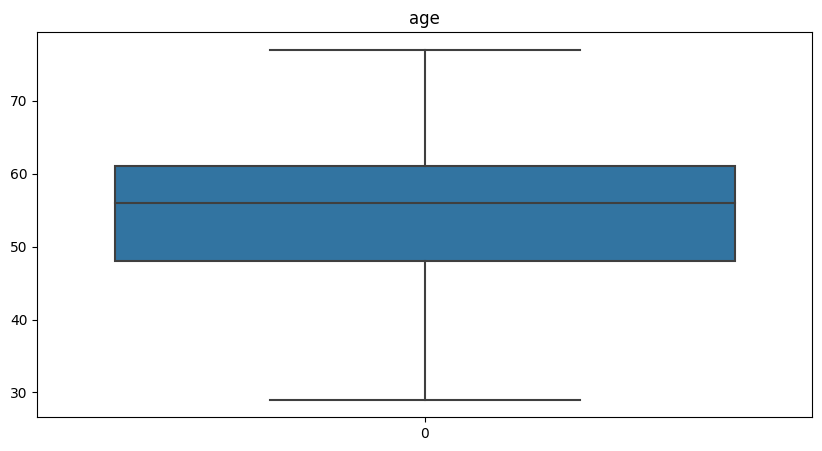

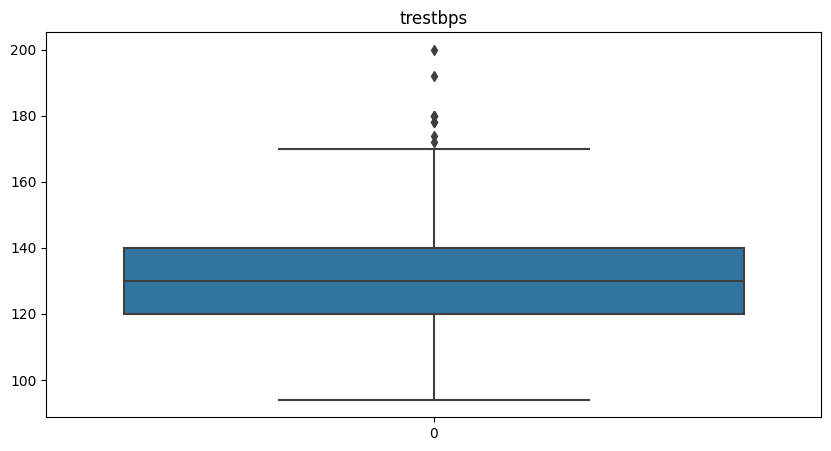

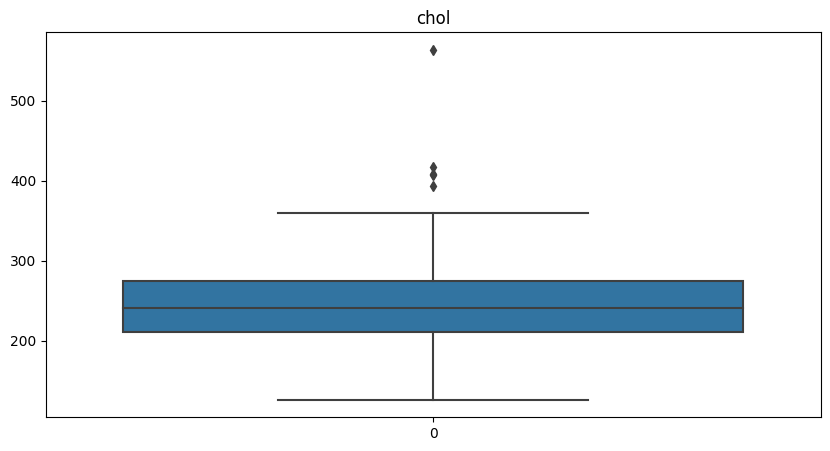

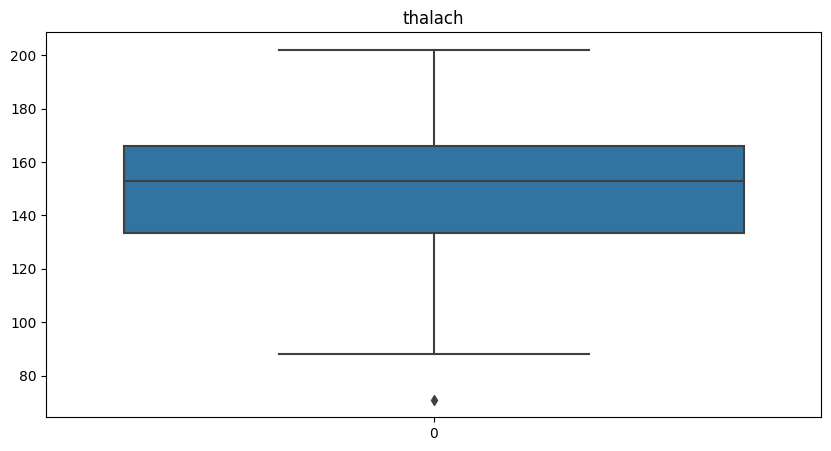

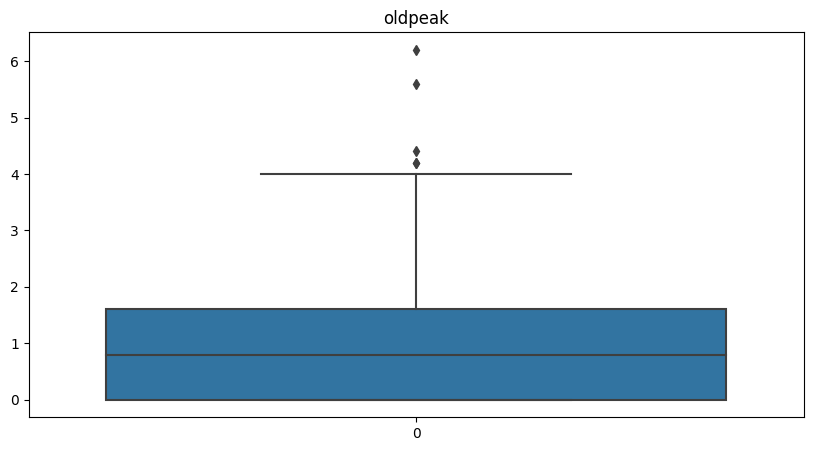

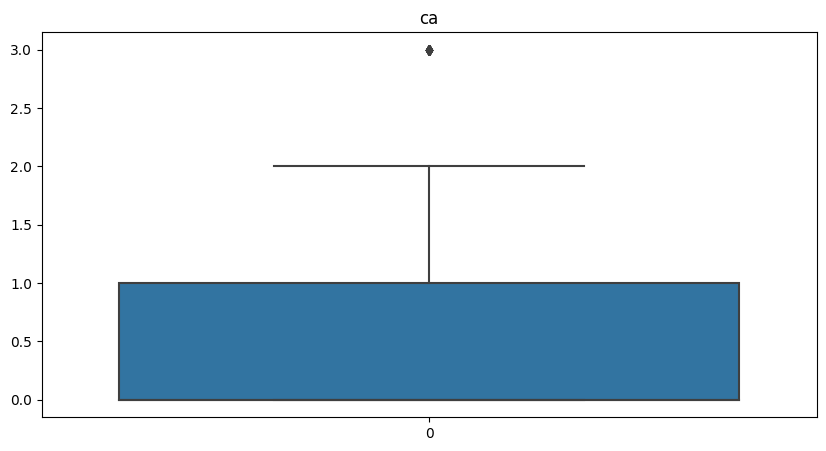

In [ ]:
#create boxplots for numerical features
num_features = ['age','trestbps','chol','thalach','oldpeak','ca']
for i in num_features:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

<ipython-input-8-ece3179a763b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


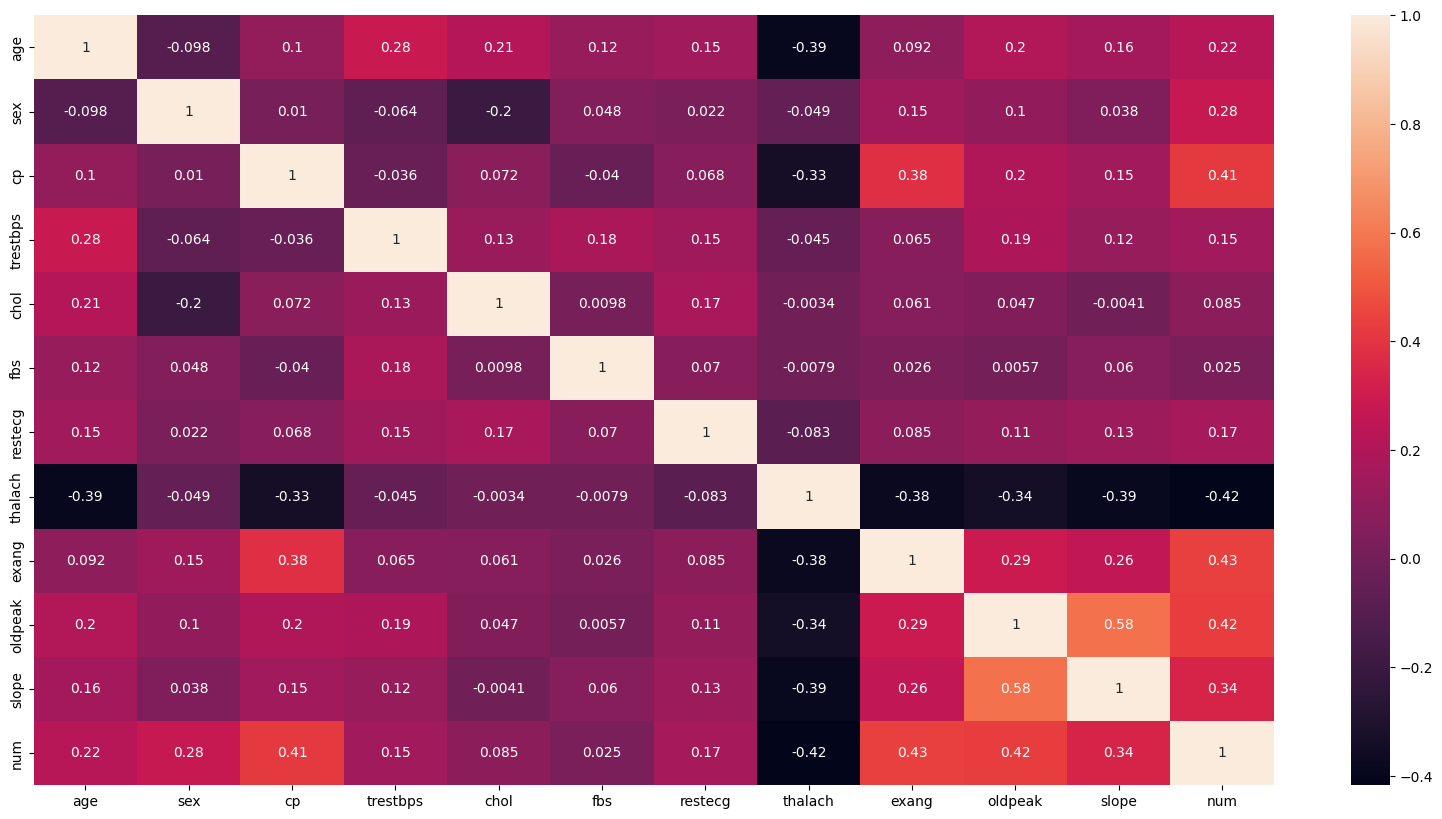

In [ ]:
#create a heatmap to check for correlation between the features
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X = data.drop('num',axis=1)
y = data['num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy score for criterion=entropy: 0.7049180327868853


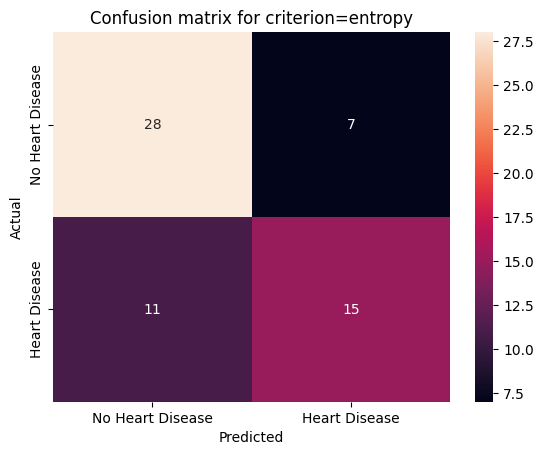

Classification report for criterion=entropy:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.68      0.58      0.62        26

    accuracy                           0.70        61
   macro avg       0.70      0.69      0.69        61
weighted avg       0.70      0.70      0.70        61



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#entropy
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy score for criterion=entropy:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for criterion=entropy')
plt.show()
print('Classification report for criterion=entropy:\n',classification_report(y_test,y_pred))

Accuracy score for criterion=gini: 0.7377049180327869


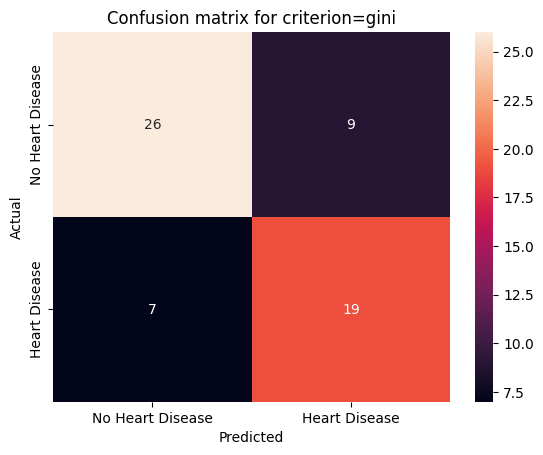

Classification report for criterion=gini:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.68      0.73      0.70        26

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy score for criterion=gini:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for criterion=gini')
plt.show()
print('Classification report for criterion=gini:\n',classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

#entropy
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
scores = cross_val_score(dtree,X_train,y_train,cv=5)
print('Accuracy scores for criterion=entropy:',scores)
print('Mean accuracy score for criterion=entropy:',scores.mean())

#gini
dtree = DecisionTreeClassifier(criterion='gini')
scores = cross_val_score(dtree,X_train,y_train,cv=5)
print('Accuracy scores for criterion=gini:',scores)
print('Mean accuracy score for criterion=gini:',scores.mean())

Accuracy scores for criterion=entropy: [0.65306122 0.69387755 0.6875     0.77083333 0.6875    ]
Mean accuracy score for criterion=entropy: 0.6985544217687075
Accuracy scores for criterion=gini: [0.69387755 0.69387755 0.60416667 0.75       0.72916667]
Mean accuracy score for criterion=gini: 0.6942176870748299


Best parameters for criterion=entropy: {'max_features': 4, 'min_samples_split': 8}
Best score for criterion=entropy: 0.7934523809523809
Best estimator for criterion=entropy: DecisionTreeClassifier(criterion='entropy', max_features=4, min_samples_split=8,
                       random_state=0)
Accuracy score for criterion=entropy: 0.7377049180327869


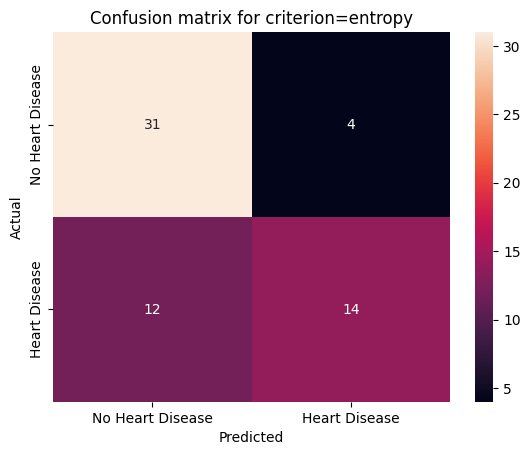

Classification report for criterion=entropy:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.78      0.54      0.64        26

    accuracy                           0.74        61
   macro avg       0.75      0.71      0.72        61
weighted avg       0.75      0.74      0.73        61



In [ ]:
from sklearn.model_selection import GridSearchCV

#entropy
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)
params = {'min_samples_split':range(2,10),'max_features':range(1,14)}
grid = GridSearchCV(dtree,params)
grid.fit(X_train,y_train)
print('Best parameters for criterion=entropy:',grid.best_params_)
print('Best score for criterion=entropy:',grid.best_score_)
print('Best estimator for criterion=entropy:',grid.best_estimator_)
y_pred = grid.predict(X_test)
print('Accuracy score for criterion=entropy:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for criterion=entropy')
plt.show()
print('Classification report for criterion=entropy:\n',classification_report(y_test,y_pred))

Best parameters for criterion=gini: {'max_features': 5, 'min_samples_split': 9}
Best score for criterion=gini: 0.7853741496598639
Best estimator for criterion=gini: DecisionTreeClassifier(max_features=5, min_samples_split=9, random_state=0)
Accuracy score for criterion=gini: 0.7213114754098361


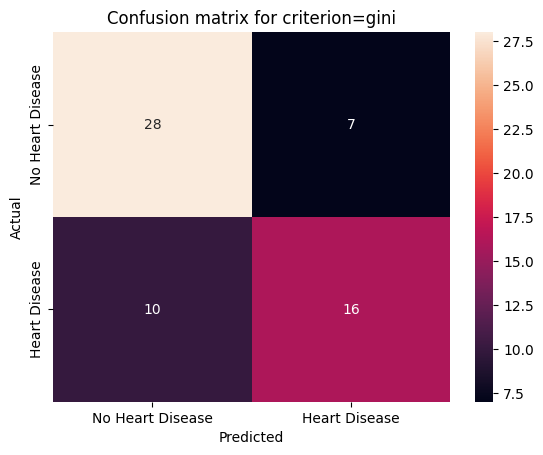

Classification report for criterion=gini:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.70      0.62      0.65        26

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
#gini
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)
params = {'min_samples_split':range(2,10),'max_features':range(1,14)}
grid = GridSearchCV(dtree,params)
grid.fit(X_train,y_train)
print('Best parameters for criterion=gini:',grid.best_params_)
print('Best score for criterion=gini:',grid.best_score_)
print('Best estimator for criterion=gini:',grid.best_estimator_)
y_pred = grid.predict(X_test)
print('Accuracy score for criterion=gini:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for criterion=gini')
plt.show()
print('Classification report for criterion=gini:\n',classification_report(y_test,y_pred))

In [ ]:
# Create a new decision tree classifier with the best hyperparameters
best_max_features = 5
best_min_samples_split = 9
dtree_best = DecisionTreeClassifier(criterion='gini', max_features=best_max_features, min_samples_split=best_min_samples_split, random_state=0)

# Fit the new decision tree on the training data
dtree_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = dtree_best.predict(X_test)

# Calculate the updated accuracy score
accuracy_best = accuracy_score(y_test, y_pred_best)
print('Updated accuracy score with best parameters (criterion=gini):', accuracy_best)

Updated accuracy score with best parameters (criterion=gini): 0.7213114754098361


Accuracy score for random forest classifier: 0.7868852459016393


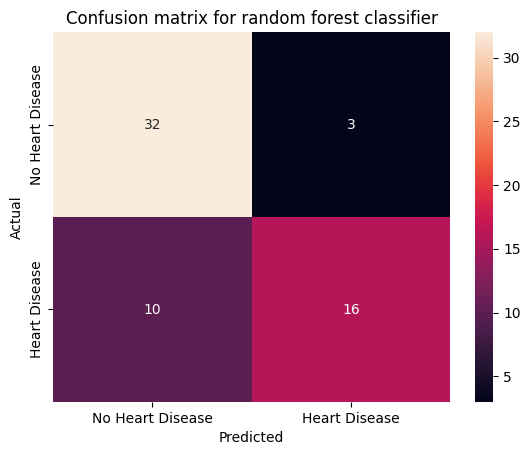

Classification report for random forest classifier:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.84      0.62      0.71        26

    accuracy                           0.79        61
   macro avg       0.80      0.76      0.77        61
weighted avg       0.80      0.79      0.78        61



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=2,random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print('Accuracy score for random forest classifier:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for random forest classifier')
plt.show()
print('Classification report for random forest classifier:\n',classification_report(y_test,y_pred))

Best parameters: {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 5}
Best score: 0.8473639455782311
Best estimator: RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)
Accuracy score: 0.8524590163934426


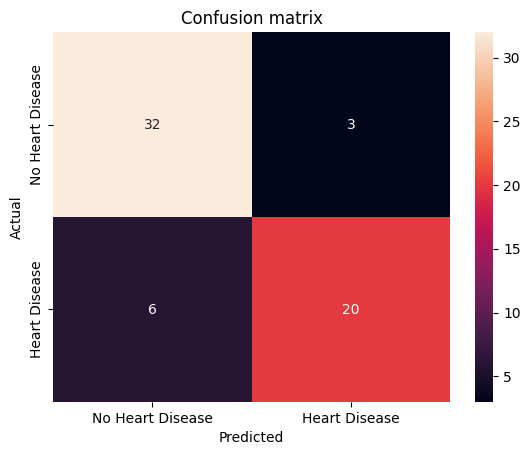

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.87      0.77      0.82        26

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [26]:
#perform grid search and report the best hyper parameters for n_estimators, max_depth and min_samples_split.

param_grid = {'n_estimators':range(1,10),'max_depth':range(1,10),'min_samples_split':range(2,10)}
grid = GridSearchCV(rfc,param_grid)
grid.fit(X_train,y_train)
print('Best parameters:',grid.best_params_)
print('Best score:',grid.best_score_)
print('Best estimator:',grid.best_estimator_)
y_pred = grid.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,xticklabels=['No Heart Disease','Heart Disease'],yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()
print('Classification report:\n',classification_report(y_test,y_pred))